**Plot simple histogram from Tab file**
1 colum X, 3 column Y
- Read file 
- Fit with 1-3 gaussians
- Plot histogram with gaussian fits


number of molecules = 2.224102041825284
diffusion time = 95.65258411290043 ms
Z0/w0 0.6486364063534136
Diffusion coefficient = 0.1699509757186744 µm²/s


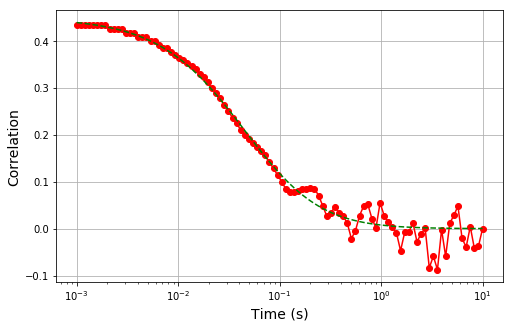

In [30]:

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import statistics
import scipy as scipy
import math
from scipy import optimize
from scipy.optimize import curve_fit

%matplotlib inline
from numpy import loadtxt

# Import data from a txt array. In this example, column 0 is time, column 1 is correlation value. 

data = loadtxt('correlation_rgnRegion1_rep0.txt', delimiter="\t")
xdata = np.power (10,data[:,0])
#xdata = data[:,0]
ydata = data[:,1]

# define the fitting function. N= number of molecules. t = diffusion time. R = z0/W0 
def func (x,N,t,R):
    return ((1/N)*np.power((1+(x/t)),-1)*np.power((1+(1/R)*(1/R)*x/t),-0.5))

popt,pcov=curve_fit(func,xdata,ydata,bounds=([0.0001,0.00001,0.1],[30000, 10, 10]))
    

#calculate the diffusion coefficient
w0 = 0.255
D = w0*w0/(4*popt[1])

fig = plt.figure(figsize=(8,5))
gs = gridspec.GridSpec(1,1)

ax1 = fig.add_subplot(gs[0])
ax1.plot(xdata,ydata,color='red', marker='o')
ax1.plot(xdata, func(xdata, *popt), 'g--')
#print (popt)

print ('number of molecules =',popt[0])
print ('diffusion time =', popt[1]*1000,'ms')
print ('Z0/w0', popt[2])
print ('Diffusion coefficient =',D,'µm²/s')

ax1.set_xlabel('Time (s)', fontsize=14)
ax1.set_ylabel('Correlation', fontsize=14)
ax1.set_xscale('log')
ax1.grid(True)

